In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv.imread("C:\\Users\\guilh_000\\Documents\\ISIC-Archive-Downloader-master\\Data\\Images\\ISIC_0000001.jpeg",0)

In [3]:
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

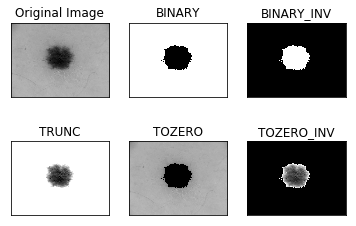

In [4]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [27]:
import os
path1="gradient.png"
if os.path.isfile(path1):
    img1 = cv2.imread(path1, 0)
else:
    print ("The file " + path1 + " does not exist.")

The file gradient.png does not exist.


In [6]:
img2 = cv.imread("C:\\Users\\guilh_000\\Documents\\ISIC-Archive-Downloader-master\\Data\\Images\\ISIC_0000001.jpeg",0)
img2 = cv.medianBlur(img2,5)

In [7]:
ret,th1 = cv.threshold(img2,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img2,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img2,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

In [8]:
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img2, th1, th2, th3]


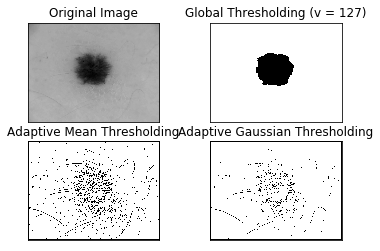

In [9]:
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [10]:
img3 = cv.imread("C:\\Users\\guilh_000\\Documents\\ISIC-Archive-Downloader-master\\Data\\Images\\ISIC_0000001.jpeg",0)

In [20]:
# global thresholding
ret1,th1 = cv.threshold(img3,127,255,cv.THRESH_BINARY_INV)
# Otsu's thresholding
ret2,th2 = cv.threshold(img3,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img3,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

In [21]:
# plot all the images and their histograms
images = [img3, 0, th1,
          img3, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

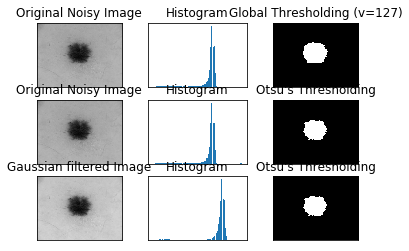

In [22]:
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [26]:
target = cv.imread("C:\\Users\\guilh_000\\Documents\\ISIC-Archive-Downloader-master\\Data\\Segmentation\\ISIC_0000001_expert.png",0)

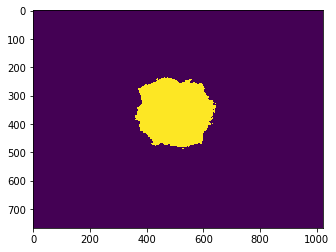

In [33]:
plt.imshow(th3)

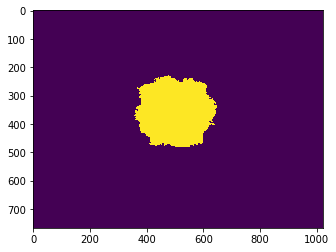

In [27]:
plt.imshow(target)

In [34]:
import numpy as np

intersection = np.logical_and(th3, target)
union = np.logical_or(th3, target)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU is %s" % iou_score)

IoU is 0.9489254108723135


In [41]:
import keras

from keras import backend as K
def iou_coef(y_true, y_pred, smooth=1):
  inter= K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
  union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
  iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
  return iou

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [ ]:
!pip install tensorflow --user